In [1]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
from torch import tensor
import numpy as np
from torch.utils.data import Dataset
from sklearn.metrics import mean_squared_error
import random
import os
import matplotlib.pyplot as plt
#from numba import jit
import pickle
from scipy.interpolate import interp1d
from torch.utils.data import DataLoader, random_split
import torch

torch.backends.cudnn.benchmark = True
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

# Model

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(2, 32, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(32)
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(128)
        
        """ self.conv4 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn4 = nn.BatchNorm1d(128)"""
        
        self.conv5 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool5 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn5 = nn.BatchNorm1d(64)
        
        
        self.fc1 = nn.Linear(896, 256)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 64)
        self.d2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        #x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        x = self.fc3(x)
        return x

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(2, 128, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 32, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(32)
        
        self.fc1 = nn.Linear(480, 256)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 64)
        self.d2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        x = self.fc3(x)
        return x

In [ ]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 128, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 64, kernel_size=5, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 32, kernel_size=5, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(32)
        
        self.fc1 = nn.Linear(416, 128)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.d2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = x[:, 0]
        batch_size = x.shape[0]
        x = x.reshape(batch_size, 1, -1)
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        x = self.fc3(x)
        return x

# Train/test functions

In [17]:
def train(train_loader, net, LR=0.1, epochs=2000, val_loader=None):
    net.to(DEVICE)
    optimizer = optim.Adam(net.parameters(), lr=LR)
    criterion = nn.L1Loss()
    all_MSE = nn.L1Loss()
    val_losses = []
    print(f"Using: {DEVICE}")
                            
    parameter_loss = []
    losses = []
    processed = 0
    last_loss = 0
    for epoch in range(epochs):
        loss = 0
        
        net.train()
        with tqdm(train_loader, unit="batch") as it:
            if epoch > 0:
                it.set_postfix(lastLoss=last_loss, valLoss=val_losses[-1])
            for idx, data in enumerate(it):
                it.set_description(f"Epoch {epoch+1}/{epochs}")
                inp, out = data['input'].to(DEVICE), data['output'].to(DEVICE)
                
                optimizer.zero_grad()
                predicted = net(inp)

                cost = criterion(out, predicted)
                loss += cost.item()
                cost.backward()
                optimizer.step()
                
                for i in range(len(predicted)):
                    current_MSE = []
                    for j in range(6):
                        current_MSE.append(all_MSE(out[i][j], predicted[i][j]).item())
                    parameter_loss.append(current_MSE)
                    processed += 1
        
        if val_loader:
            val_loss = 0
            net.eval()
            for idx, data in enumerate(val_loader):
                inp, out = data['input'].to(DEVICE), data['output'].to(DEVICE)

                predicted = net(inp)
                cost = criterion(out, predicted)
                val_loss += cost.item()
            val_loss /= len(val_loader)  
            val_losses.append(val_loss)
        
        losses.append(loss)
        last_loss = loss/len(it)
    print("Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm")
    print(f"Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10") 
    print(f"Average parameter loss: {np.mean(np.reshape(np.array(parameter_loss), (-1, 6)), axis=0)}")        
    print(f"Average overall loss: {np.sum(losses)/processed}")
    return losses, parameter_loss, val_losses

def test(test_loader, net):
    net.to(DEVICE)
    net.eval()
    criterion = nn.L1Loss()
    crit = nn.L1Loss()
    

    with torch.no_grad():
            loss = 0
            with tqdm(test_loader, unit=" batch") as it:
                for idx, data in enumerate(it):
                    inp, out = data['input'].to(DEVICE), data['output'].to(DEVICE)
                    
                    predicted = net(inp)
                    cost = criterion(out, predicted)
                    l_t = cost.item()
                    loss += l_t
                    for i in range(len(predicted)):
                        p = predicted[i].cpu().numpy().reshape(1, -1)
                        o = out[i].cpu().numpy().reshape(1, -1)
                        print(F"Predicted: {SCALER.inverse_transform(p)}")
                        print(F"Real: {SCALER.inverse_transform(o)}")
                        print(f"Difference: {abs(p - o)}\n\n")
                    
                    #print(f"\n\n\nBatch: {idx}")
                   # print(f"loss: {l_t}")
                    #for i, target in enumerate(out):
                   #     errs = []
                   #     print(f"Targer: {target}, \npredicted: {predicted[i]}\n\n")
                   #     for j in range(len(predicted)):
                   #         errs.append(abs(predicted[i]-target[i])**2)
                   #     print(f"MSE: {np.mean(errs[0])}")
            
            print(f"Average Loss: {loss/len(test_loader)}") 

# Dataset

In [10]:
with open("filtered.pkl", "rb") as f:
    runs = pickle.load(f)

In [5]:
from sklearn.preprocessing import MinMaxScaler
SCALER = MinMaxScaler()

In [8]:
# Folder name will correspond to index of sample

from sklearn.preprocessing import MinMaxScaler
SCALER = MinMaxScaler()
class Data(Dataset):
    def __init__(self, signalFolder, sampleFile, runs=range(65535), steps=128):
        # Load both disp1 and disp2 from each folder
        # Folders ordered according to index of sample
        # Use the corresponding sample as y -> append probe?
        self.input = []
        self.output = []
        
        with open(f"{sampleFile}", "rb") as f:
             samples = pickle.load(f)
        
        self.min = np.min(samples[runs])
        self.max = np.max(samples[runs])
        
        for run in tqdm(runs): #os.listdir(f"{signalFolder}/"):  
            inp = []
            fail = False
            
            files = os.listdir(f"{signalFolder}/{run}/")
            
            if files != ['Disp1.csv', 'Disp2.csv']:
                continue
            
            for file in files:
                a = pd.read_csv(f"{signalFolder}/{run}/{file}")
                a.rename(columns = {'0':'x', '0.1': 'y'}, inplace = True)
                
                if a['x'].max() != 7.0:
                    fail = True
                    break
                #a = pd.concat([pd.DataFrame([[0,0.1]], columns=a.columns), a], ignore_index=True)
                

                # Interpolate curve for consistent x values
                xNew = np.linspace(0, 7, num=steps, endpoint=False)
                interped = interp1d(a['x'], a['y'], kind='cubic', fill_value="extrapolate")(xNew)
                    
                #fix, ax = plt.subplots(1, 2)
                #ax[0].plot(xNew, interped)
                #a.plot(ax=ax[1], x='x', y='y')
                #if run == 3:
                   # break
                
                
                #if len(a) < 702:
                #    print(f"{signalFolder}/{run}/{file}: {len(a)}")
               #     fail = True
                 #   break
                
               # while len(a) > 702:
                #    a = a.drop(index=np.random.randint(0, len(a)-1)).reset_index(drop=True)
                
                #print(a)
                
                inp.append(interped.astype("float32"))
            
            if not fail:
                if len(inp) != 2:
                    raise Exception("sdf")
                #print(inp[0])
                #raise Exception("sdf")

                self.input.append(inp)
                self.output.append(samples[int(run)])
        
        SCALER.fit(self.output)
        self.output = SCALER.fit_transform(self.output)
        self.output = tensor(self.output).type(torch.cuda.FloatTensor)
        self.input = tensor(self.input).type(torch.cuda.FloatTensor)
        
    def __len__(self):
        return len(self.output)
    
    def __getitem__(self, idx):
        sample = {"input": self.input[idx], "output": self.output[idx]}
        return sample

In [9]:
dataset = Data("D:/SamplingResults", "C:/Users/rjsou/Documents/MastersDiss/Sampling/Samples.pkl", runs=[0, 1, 2])

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 181.98it/s]


In [11]:
dataset = Data("D:/SamplingResults", "C:/Users/rjsou/Documents/MastersDiss/Sampling/Samples.pkl", runs=runs)

100%|██████████████████████████████████████████████████████████████████████████████| 1362/1362 [00:21<00:00, 62.75it/s]


In [19]:
train_n = int(0.8 * len(dataset))
test_n = len(dataset) - train_n
train_set, test_set = random_split(dataset, [train_n, test_n])
train_loader, test_loader = DataLoader(train_set, batch_size=32, shuffle=True), DataLoader(test_set, batch_size=32, shuffle=True)

In [20]:
train_n

1076

# Training/testing

In [126]:
net = RNN()

In [ ]:
loss, p_loss, v_loss = train(train_loader, net, val_loader=test_loader, LR=0.001, epochs=3000)

Using: cuda:0


Epoch 68/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 25.06batch/s, lastLoss=0.146, valLoss=0.187]


Epoch 136/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.66batch/s, lastLoss=0.139, valLoss=0.194]


Epoch 204/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 19.78batch/s, lastLoss=0.14, valLoss=0.223]


Epoch 272/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 24.96batch/s, lastLoss=0.19, valLoss=0.193]


Epoch 340/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.61batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 408/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.29batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 476/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.58batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 544/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.12batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 612/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.82batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 680/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.85batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 748/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.73batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 816/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 22.78batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 884/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.96batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 952/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.77batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1020/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.58batch/s, lastLoss=0.19, valLoss=0.191]


Epoch 1088/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.98batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 1156/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.85batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1224/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.61batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 1292/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.11batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 1360/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.91batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1428/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.44batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 1496/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.65batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1564/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.78batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1632/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.87batch/s, lastLoss=0.189, valLoss=0.195]


Epoch 1700/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.04batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1768/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.74batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1836/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.93batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1904/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.78batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1972/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.89batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2040/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.10batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2108/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.81batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2176/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.89batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2244/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.70batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2312/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 23.67batch/s, lastLoss=0.19, valLoss=0.192]


Epoch 2380/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.16batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2448/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.91batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2516/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.17batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2584/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.15batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2652/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.73batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2720/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.80batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2788/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.01batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2856/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.91batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2924/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.54batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2978/3000:  44%|█████████████▋                 | 15/34 [00:00<00:00, 24.17batch/s, lastLoss=0.189, valLoss=0.193]

In [122]:
loss, p_loss, v_loss = train(train_loader, net, val_loader=test_loader, LR=0.001, epochs=3000)

Using: cuda:0


Epoch 68/3000: 100%|██████████████████████████████████| 34/34 [00:01<00:00, 24.68batch/s, lastLoss=0.13, valLoss=0.178]


Epoch 136/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.76batch/s, lastLoss=0.125, valLoss=0.294]


Epoch 204/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.26batch/s, lastLoss=0.122, valLoss=0.277]


Epoch 272/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.06batch/s, lastLoss=0.122, valLoss=0.263]


Epoch 340/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 24.54batch/s, lastLoss=0.12, valLoss=0.235]


Epoch 408/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.24batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 476/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.65batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 544/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.22batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 612/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.87batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 680/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.00batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 748/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 24.97batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 816/3000: 100%|████████████████████████████████| 34/34 [00:01<00:00, 25.05batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 884/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 25.24batch/s, lastLoss=0.189, valLoss=0.19]


Epoch 952/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 25.25batch/s, lastLoss=0.189, valLoss=0.19]


Epoch 1020/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.83batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1088/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 23.96batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 1156/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.81batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1224/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.05batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1292/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.92batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 1360/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.13batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 1428/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.73batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1496/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.37batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1564/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.32batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 1632/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.96batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1700/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.41batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1768/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.05batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 1836/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.50batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 1904/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.39batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 1972/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.83batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2040/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.38batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2108/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.28batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2176/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.30batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 2244/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.70batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2312/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.46batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2380/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.81batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2448/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.87batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2516/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.97batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2584/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.23batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2652/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.22batch/s, lastLoss=0.189, valLoss=0.191]


Epoch 2720/3000: 100%|█████████████████████████████████| 34/34 [00:01<00:00, 25.13batch/s, lastLoss=0.19, valLoss=0.19]


Epoch 2788/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.81batch/s, lastLoss=0.189, valLoss=0.193]


Epoch 2856/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 24.79batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2924/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.39batch/s, lastLoss=0.189, valLoss=0.192]


Epoch 2992/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.29batch/s, lastLoss=0.189, valLoss=0.194]


Epoch 3000/3000: 100%|███████████████████████████████| 34/34 [00:01<00:00, 25.67batch/s, lastLoss=0.189, valLoss=0.191]


Parameters: Skin YM, Adipose YM, Skin PR, Adipose PR, Skin Perm, Adipose Perm
Sampled Ranges: 10e3 - 50e3, 1e3 - 25e3, 0.48 - 0.499, 0.48 - 0.499, 10e - 12-10e10, 10e-12 - 10e10
Average parameter loss: [0.1030764  0.24835071 0.09814856 0.23619612 0.16671643 0.24115669]
Average overall loss: 0.005759680169598745


In [260]:
test(test_loader, net)

 33%|██████████████████████████▋                                                     | 3/9 [00:00<00:00, 27.44 batch/s]

Predicted: [[4.1710551e+04 2.5055935e+03 4.9043208e-01 4.8757997e-01 1.8177491e-09
  1.0333293e-09]]
Real: [[4.4861617e+04 3.3806721e+03 4.8329625e-01 4.9096087e-01 7.5521790e-11
  3.7766190e-10]]
Difference: [[0.07893205 0.03649412 0.37622058 0.17800659 1.761337   0.6628449 ]]


Predicted: [[3.8350398e+04 2.3163452e+03 4.9622795e-01 4.9280679e-01 4.8184345e-09
  1.8901398e-09]]
Real: [[4.8354633e+04 2.4622258e+04 4.8910183e-01 4.8490396e-01 1.8981691e-10
  9.6546227e-10]]
Difference: [[0.2505991  0.93024176 0.37571022 0.41608983 4.6793866  0.9347999 ]]


Predicted: [[4.1072863e+04 9.1663000e+02 4.9096119e-01 4.8682931e-01 2.1599855e-09
  1.1421452e-09]]
Real: [[4.2067422e+04 3.1289243e+03 4.8550051e-01 4.9307343e-01 4.8494697e-10
  6.1047933e-10]]
Difference: [[0.02491301 0.09226113 0.28790373 0.3287564  1.6934114  0.53748584]]


Predicted: [[3.9748152e+04 4.9361934e+03 4.9390596e-01 4.9352220e-01 3.4900320e-09
  1.5948238e-09]]
Real: [[3.1129547e+04 1.9702822e+04 4.8231593e-01 4.8864

100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 29.00 batch/s]

Predicted: [[4.0732789e+04 8.1465371e+03 4.9331248e-01 4.9457270e-01 3.1017089e-09
  1.6288736e-09]]
Real: [[4.9356500e+04 1.2920321e+04 4.8508060e-01 4.9548739e-01 1.1735453e-10
  2.3853700e-10]]
Difference: [[0.21601796 0.199085   0.43400773 0.04816025 3.0170884  1.4055564 ]]


Predicted: [[3.8987430e+04 2.5460815e+03 4.9496800e-01 4.9232146e-01 4.1389150e-09
  1.7150755e-09]]
Real: [[4.3071980e+04 1.8421141e+04 4.8616728e-01 4.8682493e-01 2.4083324e-10
  7.1459444e-10]]
Difference: [[0.10231519 0.6620506  0.46399614 0.2893964  3.940838   1.0114331 ]]


Predicted: [[4.0446000e+04 8.7252402e+03 4.9431136e-01 4.9518615e-01 3.6212970e-09
  1.7924660e-09]]
Real: [[4.1638277e+04 2.4920428e+04 4.8790449e-01 4.9689221e-01 6.0464478e-10
  5.6225286e-10]]
Difference: [[0.02986556 0.6754012  0.33779037 0.08982617 3.0497406  1.24368   ]]


Predicted: [[4.0309941e+04 7.0628784e+03 4.9398419e-01 4.9441457e-01 3.4652030e-09
  1.6968383e-09]]
Real: [[4.6840441e+04 1.6091370e+04 4.8843044e-01 4.9418

In [123]:
test(test_loader, net)

 33%|██████████████████████████▋                                                     | 3/9 [00:00<00:00, 27.92 batch/s]

Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[4.1834844e+04 5.7394360e+03 4.8770162e-01 4.8691720e-01 1.1690385e-10
  6.4697803e-10]]
Difference: [[0.01005203 0.36709675 0.02363792 0.16370934 0.07431995 0.13555747]]


Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[4.7745691e+04 9.6221318e+03 4.8941392e-01 4.8552197e-01 1.9934886e-10
  3.7233708e-10]]
Difference: [[0.13801062 0.20517349 0.11391386 0.23716936 0.00902936 0.14208996]]


Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[1.7747252e+04 7.7352285e+03 4.8163190e-01 4.9039322e-01 1.4101033e-10
  8.4949175e-10]]
Difference: [[0.6134294  0.28386456 0.2963754  0.01930463 0.04994905 0.3402881 ]]


Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[4.0475383e+04 1.9869006e+04 4.8717231e-01 4.9102

100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 29.23 batch/s]

Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[4.2662398e+04 2.0995994e+04 4.8346511e-01 4.9718031e-01 2.0630792e-10
  6.8019085e-10]]
Difference: [[0.01067764 0.26916003 0.1997251  0.3766495  0.01606475 0.1691339 ]]


Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[4.5480309e+04 1.9539910e+04 4.8736069e-01 4.9796721e-01 2.2387278e-10
  3.6914874e-10]]
Difference: [[0.08126438 0.20843571 0.00566372 0.41808105 0.03382227 0.1453132 ]]


Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[4.4610430e+04 2.3533621e+04 4.8365900e-01 4.8251432e-01 2.1412490e-10
  1.7799197e-10]]
Difference: [[0.05947447 0.37498873 0.18950106 0.39552516 0.02396747 0.33856255]]


Predicted: [[4.2236133e+04 1.4541909e+04 4.8725328e-01 4.9002656e-01 1.9041746e-10
  5.1288840e-10]]
Real: [[3.4242438e+04 2.3584924e+04 4.8784605e-01 4.8394

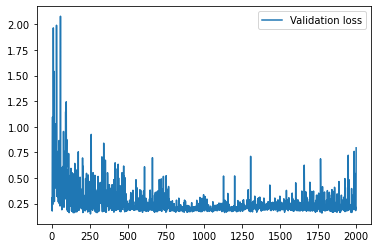

In [262]:
# MAE
plt.plot(range(len(v_loss)), v_loss, label="Validation loss")
#plt.plot(range(len(v_loss)), loss, label="Training loss")
plt.legend()

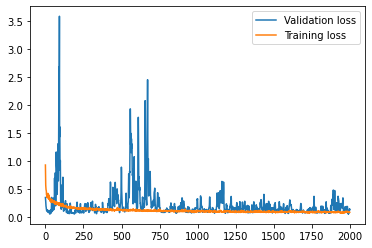

In [246]:
plt.plot(range(len(v_loss)), v_loss, label="Validation loss")
plt.plot(range(len(v_loss)), loss, label="Training loss")
plt.legend()

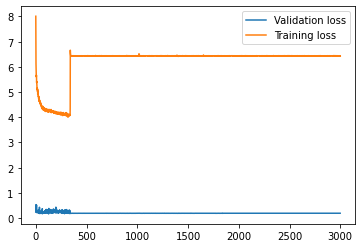

In [124]:
plt.plot(range(len(v_loss)), v_loss, label="Validation loss")
plt.plot(range(len(v_loss)), loss, label="Training loss")
plt.legend()

In [125]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.conv1 = nn.Conv1d(2, 128, kernel_size=5, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 32, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm1d(32)
        
        self.rnn = nn.RNN(15, 256, batch_first=True)
        
        self.fc1 = nn.Linear(256, 128)
        self.d1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(4096 , 128)
        self.d2 = nn.Dropout(0.75)
        
        self.fc3 = nn.Linear(128, 6)

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        
       # x = self.pool4(torch.relu(self.bn4(self.conv4(x))))
        
        
        
       # x = x.view(batch_size, -1)
        h0 = torch.zeros(1, batch_size, 256).to(x.device)
        x, _ = self.rnn(x, h0)
        
        
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        x = x.view(batch_size, -1)
        
        x = torch.relu(self.fc2(x))
        x = self.d2(x)
        
        
        
        
        
        x = self.fc3(x)
        
        x = x.view(batch_size, 6)
        return x